Meddef Model for Defense Medical Images Against Adversarial Attacks

In [2]:
# Import necessary modules
import os
import logging
import torch
from torchvision import transforms
from loader.dataset_loader import DatasetLoader
from tabulate import tabulate
from loader.preprocess import Preprocessor
from model.base_model import ModelLoader
import matplotlib.pyplot as plt

# Set the logging level
logging.basicConfig(level=logging.INFO)


In [3]:
# Specify the data directory
data_dir = './dataset'  # Replace with your dataset directory

# Get all datasets
all_datasets = DatasetLoader.get_all_datasets(data_dir)

# Initialize a dictionary to hold the datasets
datasets = {}

# Initialize classes to an empty list
classes = []

# Iterate over all datasets
for dataset_name in all_datasets:
    # Initialize the DatasetLoader
    dataset_loader = DatasetLoader(dataset_name, data_dir)

    # Load the dataset
    train_dataset, val_dataset, test_dataset = dataset_loader.load()

    # Print the classes and their counts
    try:
        classes = dataset_loader.get_and_print_classes()
        class_counts = dataset_loader.print_class_counts()
    except ValueError as e:
        logging.error(e)
        raise

    # Store the datasets in the dictionary
    datasets[dataset_name] = {
        'train': train_dataset,
        'val': val_dataset,
        'test': test_dataset
    }



INFO:root:DatasetLoader initialized for ccts.
INFO:root:DatasetLoader initialized for ccts.
INFO:root:Loading dataset: ccts.
INFO:root:Loading dataset: ccts.
INFO:root:Classes for dataset: The classes attribute is not a list.
INFO:root:Calling print_class_counts method
INFO:root:All classes: ['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']
INFO:root:All class counts: [195, 115, 148, 155]


In [4]:
def display_image(dataset, n_rows=2, n_cols=3):
    """
    Display images from a Dataset along with their corresponding labels.

    Parameters:
    - dataset (torch.utils.data.Dataset): Dataset containing images and labels.
    - n_rows (int): Number of rows in the display grid.
    - n_cols (int): Number of columns in the display grid.

    Returns:
    None
    """
    # Display n pictures of the dataset with their labels
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        image, label = dataset[i]
        ax.imshow(image.permute(1, 2, 0))  # permute the dimensions to match the expected input of imshow
        ax.set_title(label)
    plt.tight_layout()
    plt.show()


Dataset: ccts
Train set shape: (613, 2)
Val set shape: (315, 2)
Test set shape: (72, 2)

Displaying images from the training set:


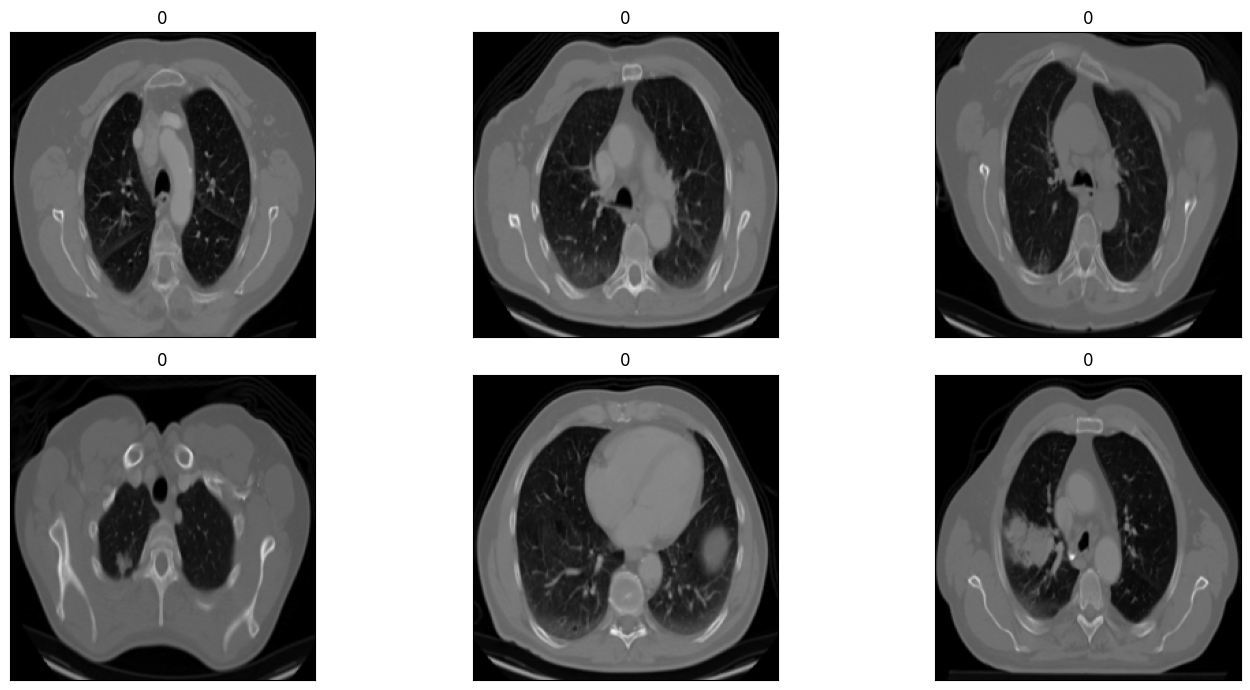

In [5]:
# Iterate over all datasets
for dataset_name in datasets:
    print(f"\nDataset: {dataset_name}")
    for split_name in ['train', 'val', 'test']:
        dataset = datasets[dataset_name][split_name]
        print(f"{split_name.capitalize()} set shape: ({len(dataset)}, 2)")  # Assuming each dataset item is an image-label pair

    # Display the first few images of the training set only
    print("\nDisplaying images from the training set:")
    display_image(datasets[dataset_name]['train'])

In [6]:
def display_head(dataset, num_items=5):
    """
    Display the first few items from a PyTorch Dataset.

    Parameters:
    - dataset (torch.utils.data.Dataset): Dataset containing images and labels.
    - num_items (int): Number of items to display.

    Returns:
    None
    """
    for i in range(num_items):
        image, label = dataset[i]
        print(f"Item {i+1}")
        print(f"Label: {label}")
        print(f"Image shape: {image.shape}")
        print("\n")

# Iterate over all datasets
for dataset_name in datasets:
    print(f"Dataset: {dataset_name}")
    for split_name in ['train', 'val', 'test']:
        dataset = datasets[dataset_name][split_name]
        print(f"{split_name.capitalize()} set:")
        display_head(dataset)

Dataset: ccts
Train set:
Item 1
Label: 0
Image shape: torch.Size([3, 224, 224])


Item 2
Label: 0
Image shape: torch.Size([3, 224, 224])


Item 3
Label: 0
Image shape: torch.Size([3, 224, 224])


Item 4
Label: 0
Image shape: torch.Size([3, 224, 224])


Item 5
Label: 0
Image shape: torch.Size([3, 224, 224])


Val set:
Item 1
Label: 0
Image shape: torch.Size([3, 224, 224])


Item 2
Label: 0
Image shape: torch.Size([3, 224, 224])


Item 3
Label: 0
Image shape: torch.Size([3, 224, 224])


Item 4
Label: 0
Image shape: torch.Size([3, 224, 224])


Item 5
Label: 0
Image shape: torch.Size([3, 224, 224])


Test set:
Item 1
Label: 0
Image shape: torch.Size([3, 224, 224])


Item 2
Label: 0
Image shape: torch.Size([3, 224, 224])


Item 3
Label: 0
Image shape: torch.Size([3, 224, 224])


Item 4
Label: 0
Image shape: torch.Size([3, 224, 224])


Item 5
Label: 0
Image shape: torch.Size([3, 224, 224])




In [7]:
from collections import Counter

def print_class_counts(all_datasets, dataset_loaders):
    # Iterate over all datasets
    for dataset_name in all_datasets:
        # Create a list to hold the table data
        table_data = []

        # Get the classes for the current dataset
        classes = dataset_loaders[dataset_name].get_and_print_classes()

        # Get counts for each dataset
        train_counts = Counter(data[1] for data in all_datasets[dataset_name]['train'])
        val_counts = Counter(data[1] for data in all_datasets[dataset_name]['val'])
        test_counts = Counter(data[1] for data in all_datasets[dataset_name]['test'])

        # Get unique labels
        unique_labels = sorted(set(train_counts) | set(val_counts) | set(test_counts))

        # Iterate through the labels to print and append counts for each dataset
        for label in unique_labels:
            class_name = label  # Use the label as the class name
            train_count = train_counts[label]
            val_count = val_counts[label]
            test_count = test_counts[label]
            table_data.append([class_name, train_count, val_count, test_count])

        # Print the table
        headers = ["Class", "Training Set", "Validation Set", "Test Set"]
        print(f"\nDataset: {dataset_name}")
        print(tabulate(table_data, headers=headers, tablefmt='grid'))

        # Clear the table data
        table_data.clear()

# Create a dictionary to hold the DatasetLoader instances
dataset_loaders = {dataset_name: DatasetLoader(dataset_name, data_dir) for dataset_name in all_datasets}

# Print counts for each dataset
print_class_counts(datasets, dataset_loaders)

INFO:root:DatasetLoader initialized for ccts.
INFO:root:Loading dataset: ccts.
INFO:root:Classes for dataset: The classes attribute is not a list.



Dataset: ccts
+---------+----------------+------------------+------------+
|   Class |   Training Set |   Validation Set |   Test Set |
+=========+================+==================+============+
|       0 |            195 |              120 |         23 |
+---------+----------------+------------------+------------+
|       1 |            115 |               51 |         21 |
+---------+----------------+------------------+------------+
|       2 |            148 |               54 |         13 |
+---------+----------------+------------------+------------+
|       3 |            155 |               90 |         15 |
+---------+----------------+------------------+------------+


In [8]:
# Test

In [9]:
# from collections import Counter
# 
# def print_class_counts(all_datasets, dataset_loaders):
#     # Iterate over all datasets
#     for dataset_name in all_datasets:
#         # Create a list to hold the table data
#         table_data = []
# 
#         # Get the classes for the current dataset
#         classes = dataset_loaders[dataset_name].get_and_print_classes()
# 
#         # Get counts for each dataset
#         train_counts = Counter(data[1] for data in all_datasets[dataset_name]['train'])
#         val_counts = Counter(data[1] for data in all_datasets[dataset_name]['val'])
#         test_counts = Counter(data[1] for data in all_datasets[dataset_name]['test'])
# 
#         # Get unique labels
#         unique_labels = sorted(set(train_counts) | set(val_counts) | set(test_counts))
# 
#         # Iterate through the labels to print and append counts for each dataset
#         for label in unique_labels:
#             class_name = classes[label]  # Use the class name corresponding to the label
#             train_count = train_counts[label]
#             val_count = val_counts[label]
#             test_count = test_counts[label]
#             table_data.append([class_name, train_count, val_count, test_count])
# 
#         # Print the table
#         headers = ["Class", "Training Set", "Validation Set", "Test Set"]
#         print(f"\nDataset: {dataset_name}")
#         print(tabulate(table_data, headers=headers, tablefmt='grid'))
# 
#         # Clear the table data
#         table_data.clear()
# 
# # Create a dictionary to hold the DatasetLoader instances
# dataset_loaders = {dataset_name: DatasetLoader(dataset_name, data_dir) for dataset_name in all_datasets}
# 
# # Print counts for each dataset
# print_class_counts(datasets, dataset_loaders)